<a href="https://colab.research.google.com/github/mazimum86/demo-repo/blob/main/Introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we6've modified it to only use two classes (pizza 🍕 & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> &#x1F511; **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [55]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-05 11:58:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   171MB/s    in 0.6s    

2023-12-05 11:58:13 (171 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project... this usually means visualizing many samples of your data.

In [56]:
!ls pizza_steak

test  train


In [57]:
!ls pizza_steak/train/

pizza  steak


In [58]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [59]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [60]:
# The extra file in our pizza_steak directory is ". DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec  5 10:16 .
drwxr-xr-x 1 root root 4096 Dec  5 11:58 ..
drwxr-xr-x 4 root root 4096 Dec  5 10:16 test
drwxr-xr-x 4 root root 4096 Dec  5 10:16 train


In [61]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first lets get the class names programmatically.

In [62]:
# Get the classnames programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories in the training folder

print(class_names)

['pizza' 'steak']


In [63]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape:  {img.shape}") # show the shape of the image

  return img

['3703769.jpg']
Image shape:  (512, 512, 3)


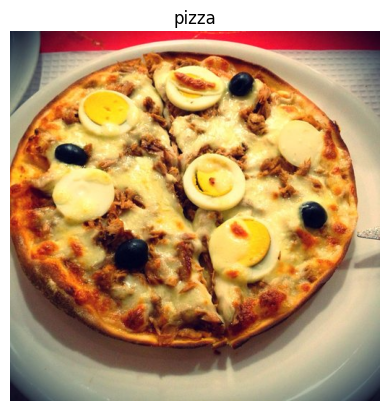

In [64]:
# View a random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [65]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[21, 29, 50],
        [23, 31, 52],
        [28, 36, 57],
        ...,
        [30,  2, 27],
        [29,  1, 26],
        [28,  0, 25]],

       [[22, 30, 51],
        [24, 32, 53],
        [29, 37, 58],
        ...,
        [31,  3, 28],
        [30,  2, 27],
        [28,  0, 25]],

       [[23, 31, 52],
        [25, 33, 54],
        [29, 37, 56],
        ...,
        [32,  2, 28],
        [31,  1, 27],
        [30,  0, 26]],

       ...,

       [[12, 13, 31],
        [12, 13, 31],
        [12, 13, 31],
        ...,
        [15, 16, 34],
        [15, 16, 34],
        [15, 16, 34]],

       [[12, 13, 31],
        [12, 13, 31],
        [12, 13, 31],
        ...,
        [15, 16, 34],
        [15, 16, 34],
        [15, 16, 34]],

       [[12, 13, 31],
        [12, 13, 31],
        [12, 13, 31],
        ...,
        [15, 16, 34],
        [15, 16, 34],
        [15, 16, 34]]], dtype=uint8)>

In [66]:
# View the image shape
img.shape  # returns width, height, colour channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [67]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img/255

array([[[0.08235294, 0.11372549, 0.19607843],
        [0.09019608, 0.12156863, 0.20392157],
        [0.10980392, 0.14117647, 0.22352941],
        ...,
        [0.11764706, 0.00784314, 0.10588235],
        [0.11372549, 0.00392157, 0.10196078],
        [0.10980392, 0.        , 0.09803922]],

       [[0.08627451, 0.11764706, 0.2       ],
        [0.09411765, 0.1254902 , 0.20784314],
        [0.11372549, 0.14509804, 0.22745098],
        ...,
        [0.12156863, 0.01176471, 0.10980392],
        [0.11764706, 0.00784314, 0.10588235],
        [0.10980392, 0.        , 0.09803922]],

       [[0.09019608, 0.12156863, 0.20392157],
        [0.09803922, 0.12941176, 0.21176471],
        [0.11372549, 0.14509804, 0.21960784],
        ...,
        [0.1254902 , 0.00784314, 0.10980392],
        [0.12156863, 0.00392157, 0.10588235],
        [0.11764706, 0.        , 0.10196078]],

       ...,

       [[0.04705882, 0.05098039, 0.12156863],
        [0.04705882, 0.05098039, 0.12156863],
        [0.04705882, 0

In [68]:
#pip install tensorflow==2.3.0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [69]:
import tensorflow as tf

#from tensorflow.keras.image import ImageDataGenerator





# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"           # Same as above

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                                class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGC on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1= model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.5320 - accuracy: 0.7293 - val_loss: 0.4251 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 8s 162ms/step - loss: 0.4516 - accuracy: 0.7893 - val_loss: 0.4158 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4278 - accuracy: 0.8193 - val_loss: 0.4182 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4035 - accuracy: 0.8153 - val_loss: 0.3576 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.3440 - accuracy: 0.8600 - val_loss: 0.3668 - val_accuracy: 0.8340


> &#x1F511;**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you are using a GPU by going to Runtime -> Change Runtime Type -> Hardware Aceelator -> GPU (you may have to rerun some cells above).

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 104s 2s/step - loss: 0.6925 - accuracy: 0.5927 - val_loss: 0.4821 - val_accuracy: 0.8060


In [70]:
# Get a model summary
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                

&#x1F6E0; **Exercise:** Go through the CNN explainer website for a minimum of 10 mins and compare our neural network with theirs: https://poloclub.github.io/cnn-explainer/


## Using the same model as before

Let's replicate the model we've built in a previous section to see if works with our image data.

The model we're building is from the [TensorFlow playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.31543&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [71]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 112ms/step - loss: 0.9936 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 152ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 146ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [72]:
# Get a summary for model_2
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 150528)            0         
                                                                 
 dense_35 (Dense)            (None, 4)                 602116    
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [73]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but lets step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu" ),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 185ms/step - loss: 2.6537 - accuracy: 0.6373 - val_loss: 0.6266 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 1.1513 - accuracy: 0.6900 - val_loss: 1.1325 - val_accuracy: 0.6040
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.9725 - accuracy: 0.6927 - val_loss: 0.5687 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 7s 152ms/step - loss: 0.6006 - accuracy: 0.7560 - val_loss: 0.6218 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5845 - accuracy: 0.7633 - val_loss: 0.4499 - val_accuracy: 0.7860


In [74]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 150528)            0         
                                                                 
 dense_38 (Dense)            (None, 100)               15052900  
                                                                 
 dense_39 (Dense)            (None, 100)               10100     
                                                                 
 dense_40 (Dense)            (None, 100)               10100     
                                                                 
 dense_41 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
15000000/31000


483.8709677419355

&#x1F511;**Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we are using. Where a possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

In [76]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                

## Binary Classification: Lets break it down

1. Become one with the data (visualize, visualize,visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. EValuate the model
6. Adjust different parameters and improve the model(try to beat ouri baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1724717.jpg']
Image shape:  (512, 512, 3)
['1412034.jpg']
Image shape:  (512, 512, 3)


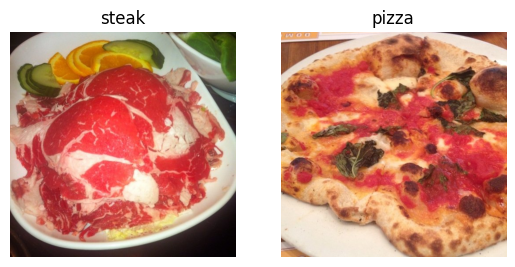

In [95]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/", 'pizza')

### 2. Preprocess the data (prepare it for our model, the main step here was scaling/normalizing & turning our data into batches)

In [96]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~ 10,000 images at a time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=en


In [100]:
# Create train and test data generators and rescale the data
train_datagen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)



In [101]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target directory of images
                                               target_size = (224,224), # Target size of images
                                               class_mode = "binary", # type of data you're working with
                                               batch_size = 32)    # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [102]:
# Get a sample of a train data batch
images, labels = train_data.next()  # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [103]:
# How many batches are there?
len(train_data)

47

In [104]:
1500/32

46.875

In [106]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [109]:
images[7].shape

(224, 224, 3)

In [110]:
# view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then you keep experimenting, you try to beat the baseline

 &#x1F511;**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [113]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [114]:
# Create the model (this will be ouri baseline, a layer convulational neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding windows going across the input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if same, output shape is same as input shape, if 'valid', output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)), # Input layer (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

🛠 **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/


In [115]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



In [116]:
# Get a summary of our model
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_13 (Flatten)        (None, 475240)            0         
                                                                 
 dense_42 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [117]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [121]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
           epochs=5,
            steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 147ms/step - loss: 0.7208 - accuracy: 0.6907 - val_loss: 0.5630 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4319 - accuracy: 0.8113 - val_loss: 0.3916 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.2772 - accuracy: 0.8973 - val_loss: 0.3610 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.1257 - accuracy: 0.9680 - val_loss: 0.4452 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.0535 - accuracy: 0.9887 - val_loss: 0.7016 - val_accuracy: 0.7340


### 5. Evaluate our model

It looks like our model is learning something. lets evaluate it.

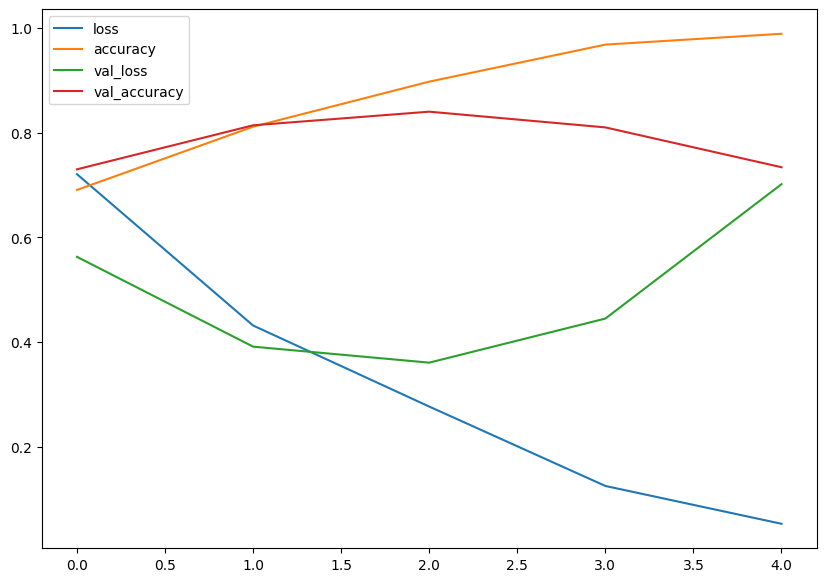

In [124]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [136]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

&#x1F511;**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

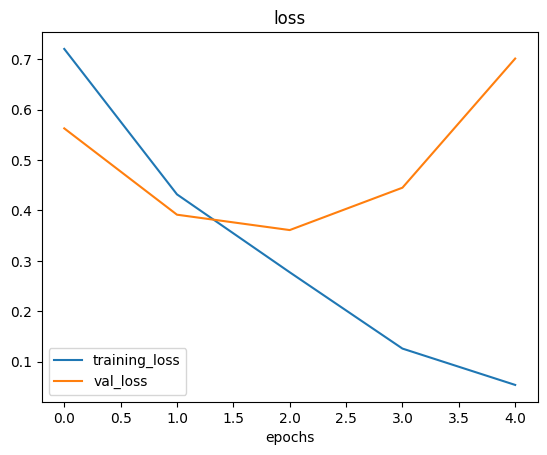

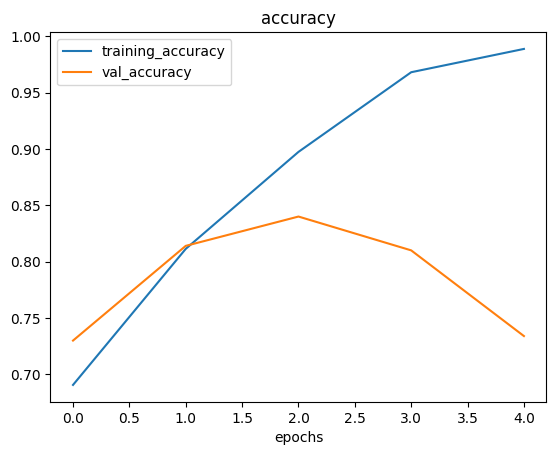

In [137]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

&#x1F511; **Note:** Ideally the two loss curves(training and validation) will be very similar to each other (decreasing at similar rates), when there are large differences your model may be **overfitting**

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of Conv layers
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

>&#x1F511; **Note:** Reducing overfitting is also known as **regularization**

In [142]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [143]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [144]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data = test_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 129ms/step - loss: 0.6844 - accuracy: 0.5573 - val_loss: 0.6356 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5543 - accuracy: 0.7307 - val_loss: 0.4416 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4571 - accuracy: 0.7880 - val_loss: 0.3739 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4035 - accuracy: 0.8327 - val_loss: 0.3328 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 8s 167ms/step - loss: 0.3751 - accuracy: 0.8400 - val_loss: 0.3793 - val_accuracy: 0.8360


In [145]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 26, 26, 10)      

In [146]:
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_13 (Flatten)        (None, 475240)            0         
                                                                 
 dense_42 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


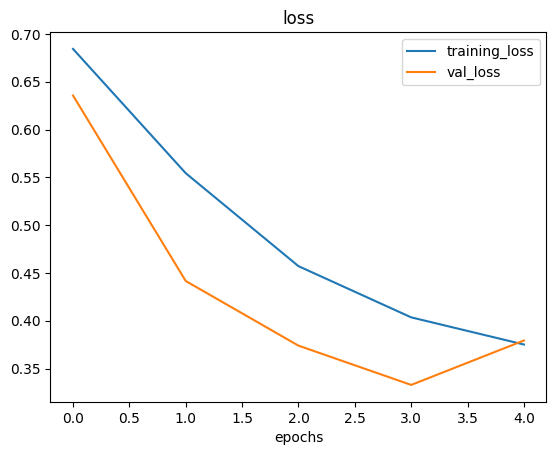

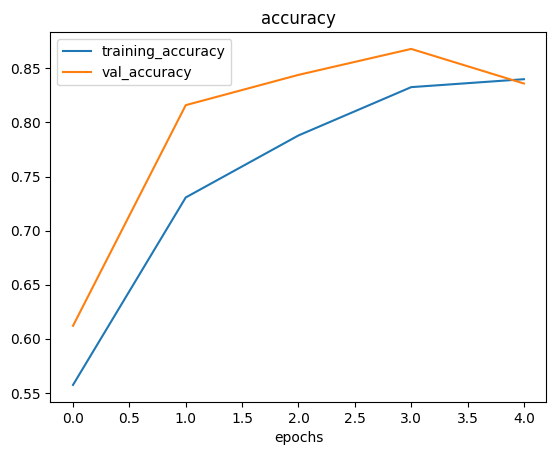

In [147]:
# Plot loss curves
plot_loss_curves(history_5)